# Project: Investigating Trends and Correlations in Movies Released Between 1960 and 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Description**: The data set I chose to analyze in this project contains information about 10,000 movies collected from The Movie Database (TMDb), including movie id, popularity, original title, director, budget and revenue (both adjusted for inflation and not), and release year. Over the course of this report, I plan on exploring four main quesitons: First, do big budget films make more profit relative to their budget than small budget films? Second, which production companies produced the most films independently (without collaborating with another studio) since 1960? Third, what is the relationship, if any, between time and number of movies released per year? And finally, which directors have been the most prolific since 1960?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Description**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

First, we will simply inspect the data to get a feel for it and see if there are any irregularities or if there is any superflous information we don't need. 

In [2]:
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [3]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
movies_df.shape

(10866, 21)

In [5]:
movies_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

So, every column has the appropriate datatype and hence there is no need to change any of them.

In [6]:
pd.isnull(movies_df).sum() > 0

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

According to cell above, 9 columns have missing values in at least one row (NAN values). Therefore, we must fill these NaN values first.

In [7]:
movies_df.duplicated().sum() > 0

True

Since the result above is true, this means that there is at least one row out of the 10,866 rows that is an exact duplicate of another. The first step therefore, is to get rid of any duplicate rows in the data.

### Data Cleaning

Since we figured out in the section above that there is at least one duplicate row, we will now delete all duplicates.

In [8]:
movies_df.drop_duplicates(inplace=True)

In [9]:
movies_df.shape

(10865, 21)

Now, in the section above we found that there are 9 columns with NaN values. It would be helpful to know how many rows total are responsible for those NaN values.

In [10]:
movies_df.isnull().any(axis=1).sum()

8873

So, there are 8,873 rows with NAN values within those 9 columns. Let's see the missing value count for each column:

In [11]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
print(movies_df.isnull().sum().sum())

13433


So there are 13,433 NaN values in dataset. We must now figure out the best way to deal with them in order to make the dataset consistent and ready for analysis.

In [13]:
movies_df['homepage'].fillna('Not Available', inplace=True)

Now let's check if the code worked on the appropriate column.

In [14]:
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                   0
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

It did indeed work so now let's do this for all suitable columns.

In [15]:
movies_df['director'].fillna('Not Available', inplace=True)
movies_df['keywords'].fillna('Not Available', inplace=True)
movies_df['cast'].fillna('Not Available', inplace=True)
movies_df['tagline'].fillna('Not Available', inplace=True)
movies_df['production_companies'].fillna('Not Available', inplace=True)
movies_df['overview'].fillna('Summary not available', inplace=True)
movies_df['imdb_id'].fillna('Not Available', inplace=True)
movies_df['genres'].fillna('Not Available', inplace=True)

In [16]:
movies_df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

The next step is to make the data as concise as possible, so we will get rid of any columns which we do not need for our analysis. These include imdb_id, homepage, tagline, overview, and keywords since these columns have no effect on budget, revenue, popularity, number of movies released per year, or directors who released those films.

In [17]:
movies_df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

In [18]:
movies_df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We have checked that all datatypes match, all missing data has been accounted for, duplicates have been deleted and all structural problems have been addressed. So we are ready to analyze data and come up with answers!

<a id='eda'></a>
## Exploratory Data Analysis

> **Description**: In this section, we will compute statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section.

### Research Question 1: Do high budget films make more profit relative to their budget than low budget films?

First, we will define what constitutes a 'high budget' film and a 'low budget' film

In [19]:
movies_df['budget_adj'].describe()

count    1.086500e+04
mean     1.754989e+07
std      3.430753e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

So, the average amount spent on a film, using adjusted budget figures, was $17,549,890. We are using adjusted budget values because since different movies were released in different years, the value of the dollar changed in those years thanks to inflation, so we use adjusted values which account for inflation, hence dollar values for all movies are equal, and that allows us to draw clear comparisons. 

Now, since the average budget for a film was 17,549,890 dollars. We will call any film that had a budget greater than or equal to $17,549,890 dollars, a 'high budget' film and any film with a budget smaller than 17,549,890 dollars a 'low budget' film.

In [20]:
movies_df['gross_profit_adj'] = movies_df['revenue_adj'] - movies_df['budget_adj']

In [21]:
conditions = [(movies_df.budget_adj >= 17549890),
              (movies_df.budget_adj < 17549890)]

choice_list = ['high_budget', 'low_budget']

movies_df['budget_type'] = np.select(conditions, choice_list, default=-1)

We will now verify that the code above created a new column called 'budget_type' and has sorted the films into either the 'high_budget' or 'low_budget' categories.

In [22]:
movies_df.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,gross_profit_adj,budget_type
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,high_budget
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,high_budget
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,high_budget
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,high_budget
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,high_budget


In [23]:
movies_df.query('budget_type == "high_budget"')['gross_profit_adj'].mean(), movies_df.query('budget_type == "low_budget"')['gross_profit_adj'].mean()

(101204528.56156683, 8422549.4173409864)

The average gross profit for high budget films, those with a budget over 17,549,890 dollars, was 101,204,528 dollars. While the average gross profit for low budget films, those with a budget under 17,549,890 dollars, was 8,422,549 dollars.

So in absolute terms, high budget films make more profit than low budget films. This may be obvious, so a better metric to use in order to find how profitable films are relative to their budget is to find their gross profit margin. This is a metric used to assess financial health by revealing the proportion of money left over from revenues after accounting for the cost of goods sold. 

The formula for determining the gross profit margin is: 
$$
Gross Profit Margin = \frac{(Revenue - Budget)}{Revenue} = \frac{Profit}{Revenue}
$$

Since we calculated the profit for each type of film above, we just need to divide by the mean revenue of each. In order to do that, we must first find the mean gross profit margin of both high budget and low budget films.

In [24]:
movies_df.query('budget_type == "high_budget"')['revenue_adj'].mean(), movies_df.query('budget_type == "low_budget"')['revenue_adj'].mean()

(160070494.83981499, 10401033.133470451)

Finally the mean gross profit margin for high budget films is:
$$ GPM = \frac{Profit}{Revenue} = \frac{$101,204,528}{$160,070,494} = 0.632 $$

And the mean gross profit margin for low budget films is:
$$ GPM = \frac{Profit}{Revenue} = \frac{$8,422,549}{$10,401,033} = 0.810 $$

In the following cells we will create graphs to visually show the difference in Mean Gross Profit and Mean Gross Profit Margin between big budget films and low budget films.

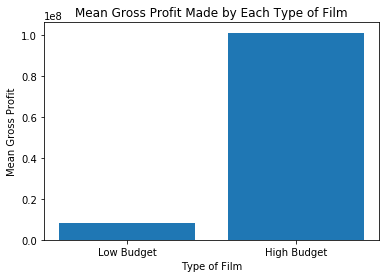

In [25]:
gp_locations = [1, 2]
gp_heights = [8422549, 101204528]
gp_labels = ['Low Budget', 'High Budget']
plt.bar(gp_locations, gp_heights, tick_label = gp_labels)
plt.title('Mean Gross Profit Made by Each Type of Film')
plt.xlabel('Type of Film')
plt.ylabel('Mean Gross Profit');

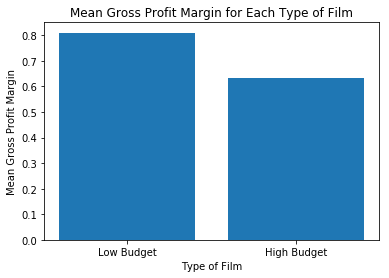

In [26]:
gpm_locations = [1, 2]
gpm_heights = [0.810, 0.632]
gpm_labels = ['Low Budget', 'High Budget']
plt.bar(gpm_locations, gpm_heights, tick_label = gpm_labels)
plt.title('Mean Gross Profit Margin for Each Type of Film')
plt.xlabel('Type of Film')
plt.ylabel('Mean Gross Profit Margin');

In conclusion, even though high budget films make much more gross profit, it turns out that low budget films earn 81 cents on the dollar in gross profit margin while high budget films earn only 63 cents on the dollar in gross profit margin. Meaning that relative to their revenue, low budget films are actually more profitable, (have a higher return on investment), than high budget films.

### Research question 2: Which production companies produced the most films independently since 1960?

Again, most of the work has been done so that we can easily analyze this question. In the following cells we will group the movies dataframe by production companies. After that, we will count how many times they appear, order them in descending order. And finally create graphs so we can visually interpret the findings.

In [27]:
companies_df = movies_df.groupby('production_companies').count()

In [28]:
companies_df['id'].sort_values(ascending=False).head(6)

production_companies
Not Available                1030
Paramount Pictures            156
Universal Pictures            133
Warner Bros.                   84
Walt Disney Pictures           76
Metro-Goldwyn-Mayer (MGM)      72
Name: popularity, dtype: int64

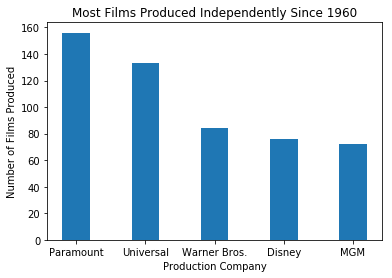

In [37]:
pc_locations = [1, 3, 5, 7, 9]
pc_heights = [156, 133, 84, 76, 72]
pc_labels = ['Paramount', 'Universal', 'Warner Bros.', 'Disney', 'MGM']
plt.bar(pc_locations, pc_heights, tick_label = pc_labels)
plt.title('Most Films Produced Independently Since 1960')
plt.xlabel('Production Company')
plt.ylabel('Number of Films Produced');

Based on the data and graph above, Paramount Pictures has produced the most films independently since 1960, producing 156 films. Followed by Universal Pictures with 133 films, Warner Bros. with 84 films, Walt Disney Pictures with 76 films, and finally MGM with 72 films.

### Research Question 3: Has the number of films produced per year increased with time?

All the data has been cleaned and structured so that this question is easily analyzable. Therefore, we will display several graphs showing the relationship between time and the number of films produced per year in the following cells.

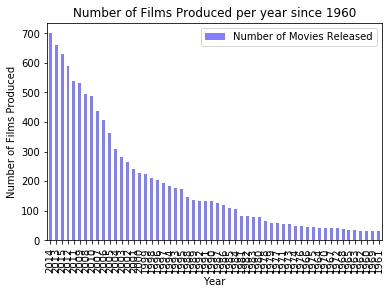

In [30]:
movies_df['release_year'].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='Number of Movies Released')
plt.legend()
plt.title('Number of Films Produced per year since 1960')
plt.xlabel('Year')
plt.ylabel('Number of Films Produced');

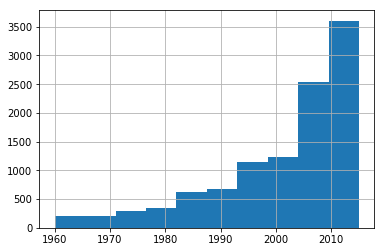

In [31]:
movies_df['release_year'].hist();

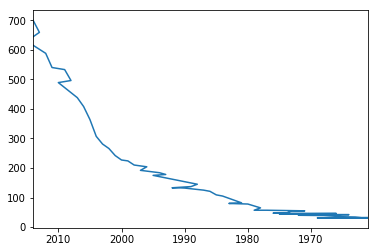

In [32]:
movies_df['release_year'].value_counts().plot(kind='line');

Clearly, ever since 1960, the amount of movies made per year has been steadily increasing. Growing from around 50 movies in 1960 to 700 movies per year in 2015. This could be attributed to the growing importance and influence of the cinematic world as well as the technological evolution that has been taking place since 1960. However, conclusive statistical tests would need to be run before we could say there is a causal relationship between any of the aforementoined factors and the amount of movies made per year.

### Research Question 4: Which directors were the most prolific since 1960?

The data has been mostly cleaned for this analysis already. All we will do below is create a new dataframe grouped by director and then count how many times that director is present.

In [33]:
directors = movies_df.groupby('director').count()

In [34]:
directors['vote_average'].sort_values(ascending=False).head(6)

director
Woody Allen         45
Not Available       44
Clint Eastwood      34
Martin Scorsese     29
Steven Spielberg    29
Ridley Scott        23
Name: vote_average, dtype: int64

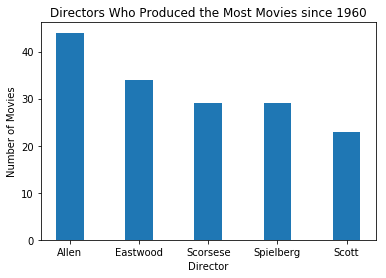

In [35]:
dc_locations = [1, 3, 5, 7, 9]
dc_heights = [44, 34, 29, 29, 23]
dc_labels = ['Allen', 'Eastwood', 'Scorsese', 'Spielberg', 'Scott']
plt.bar(dc_locations, dc_heights, tick_label = dc_labels)
plt.title('Directors Who Produced the Most Movies since 1960')
plt.xlabel('Director')
plt.ylabel('Number of Movies');

Based on the available data, the most prolific director was Woody Allen with over 40 films directed followed by Clint Eastwood (34), Martin Scorsese and Steven Spielberg (both with 29), and Ridley Scott (23).

<a id='conclusions'></a>
## Conclusions


> Based on the data given, low budget films are more profitable relative to their budgets than high budget films. However, it is not clear whether the data given encompasses all movies made since 1960 or is merely a sample. And if it is a sample, we have no way of knowing whether it can be considered a statistically accurate representative sample of all the data. Therefore more data would need to be presented and analyzed, and more statistical tests be run in order to statistically solidify the findings in this report.

> With respect to question 2 and question 4 of the report, all findings reported can only be counted valid if using the exact same data as was used above. If any new data was to be available, the new data would need to be incorporated into the analysis. However, the analysis would be nearly identical to the one performed in this report. Furthermore, in both questions a large part of critical information was not available to us. 1,030 films had no available production company and 40 films had no available director therefore, the reader of the findings must also take these factors into consideration.  

> Finally with respect to question 3, the report showed a clear positive correlation between time and the number of films produced per year. Having said that however, since no statistical tests were run, we would need more data, as well as more insight into the cinematic industry and clear statistical tests to be able to confidently state that there exists a causal relationship between the two.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0